# LOCATION, LOCATION, LOCATION: 
## ANALYSIS AND VISUALISATION OF GEOSPATIAL DATA IN PYTHON

### *Michele Ferretti - King's College London*

### PyCon Nove - Florence, 19<sup>th</sup>-22<sup>nd</sup> April 2018

# Disclaimer

- **Beginners most welcome! **

- **Advanced users most welcome!**

# Programme:



- **Formats**!

-  **Coordinate Reference Formats**!

-  **Analysis**!

-  **Visualization**!

# What is Geographic Data? (and why should I care)

> Any data with a <span class="alert">location</span> component.

- We can use geodata to analyze and/or visualize any event that happens <span class="black">somewhere</span> on the Earth!

- Many different types, but can be grouped in two categories: <span class="black">vector</span>  vs <span class="black">raster</span> data.

# Vector


- **Points**: crime events, pollution samples, social-media check-ins..
![](imgs/point-map.jpg)

- **Lines**: GPS traces, streets, social networks...
![](imgs/line-map.jpg)

- **Polygons**: Country boundaries, Census tracts, catchment areas...
![](imgs/vector.gif)

# Raster

![](imgs/remote-sensing.jpeg)

![](imgs/dem.jpg)

![](imgs/temperature.png)

Most of the time you'll work with Vector data...so let's skip Rasters for now!

# Shapefile

![](https://ih1.redbubble.net/image.439227781.4623/flat,800x800,070,f.u1.jpg)

![](imgs/shapefile.png)

Composed by (at <span class="black">least</span>) three files: 


- **.shp**= Contains the actual *geometries* (Points, Lines, Polygons...)

    

- **.dbf** = `dBASE` file contains the attribute information table in standard `DBF` *format*

- **.shx**= Indexing file for look-ups etc..


Optional, but quite important is:
- **.prj** = contains the data <span class="alert">projection</span> (more on this later...)

> “80% of successful GIS work is having a good folder structure”
>  [@Shapefile](https://twitter.com/shapefiIe)



# GeoJSON

![](imgs/geojson.png)

- JSON (JavaScript Object Notation) superset (Easily understood by Javascript!) 

- Open standard [geojson.org](http://geojson.org/)

-  *"Supports geometry types: `Point`, `LineString`, `Polygon`, `MultiPoint`, `MultiLineString`, and `MultiPolygon`. Additional properties are `Feature` objects. Sets of features are contained by `FeatureCollection` objects"*

- Geoweb *De facto* standard, e.g. [Github](https://gist.github.com/miccferr/156889b8a655def77fcfedecd55861cd#file-thailand-geojson) 

![](imgs/gist.png)

# Other formats

- **Mapbox Vector Tiles** = The (relatively) new kid on the block! [MPX Tile Spec](https://www.mapbox.com/vector-tiles/specification/)

- **QA Tiles** = "OpenStreetMap data as Mapbox Vector Tiles in an MBTiles file for data analysis" [mbtiles-spec](https://github.com/mapbox/mbtiles-spec)

- **Keyhole Markup Language (KML)** = Good 'ol Google Earth!

- **GeoTIFF** = Geo-referenced imagery

- **ADRG**, **Digital raster graphic (DRG)**, **ECRG**, **ECW**, **Esri grid**, **IMG**, **JPEG2000**, **MrSID**, **netCDF-CF**, **RPF**, **CADRG**, **CIB**, **AutoCAD DXF**, **Cartesian coordinate system (XYZ)**, **Digital line graph (DLG)**, **Esri TIN **, **Geography Markup Language (GML)**, **GeoMedia**, **ISFC**, **MapInfo TAB format**, **National Transfer Format (NTF)**, **Spatialite**,  **Simple Features**, **SOSI**, **Spatial Data File**, **TIGER**, **Vector Product Format (VPF)**, **Grid formats (for elevation)**, **USGS DEM**, **GTOPO30**, **DTED**, **SDTS**, **Dual Independent Map Encoding (DIME)**, **Geographic Data Files (GDF) **, **GeoPackage (GPKG)**, **Well-known text (WKT)**, **Well-known binary (WKB)**, **World file**

# Openstreetmap!

![](imgs/osm-tot.png)

- Whole <span class="black">planetary dataset</span> makes for ~over 846 GB uncompressed (60.7 GB bzip2-compressed) [Planet.OSM Wiki](https://wiki.openstreetmap.org/wiki/Planet.osm).

- ODBL License

- You can also find extracts for individual continents, countries, and metropolitan areas! (e.g. [Geofabrik.de](https://download.geofabrik.de/) )

- Or you can query  <span class="alert"> individual features </span> using the awesome[Overpass API](https://overpass-turbo.eu/master/?q=LyoKVGhpcyBoYcSGYmVlbiBnxI1lcmF0ZWQgYnkgdGhlIG92xJJwxIlzLXR1cmJvIHdpemFyZC7EgsSdxJ9yaWdpbmFsIHNlxLBjaMSsxIk6CsOiwoDCnGFtxI1pdHk9cmVzdGHEqGFudCDEuiBGacWSbnplxYjCnQoqLwpbb3V0Ompzb25dW3RpxYzFq8WtMjVdOwovLyBmZXTFgiDEsMWAIMWIwpzFnsWgxaLFpMSbxKvEv8WBxYPEugp7e8SQb2NvZGVBxZJhOsaMxI3Fon19LT4uxpJyxYLGn8WAxb3Fv8SPxJTEnXIgxZJzdWx0cwooCiAgxrFxdcSSxJrEo3LFmmZvcjrGicWJxYvFjcWPxZHFk8WVxZfFmcWkxr8gbsacZVsix5BuxY55Ij0ixrfHlcSTxZkiXSjGh2HGqsWAxqxoxq5hKcW9Cse2xb7GgHDEt8WZxrbFk8a5xrsKxbjEmMacecW9PsW9yIRza2XEvXF0Ow&c=BORt36R5FP&R)

![](imgs/overpass-example.png)

In [49]:
import overpass
import json

api = overpass.API()
area_name = "Firenze"
query = """area[name="{}"]->.a;(node["amenity"="restaurant"](area.a);<;);""".format(area_name)
response = api.Get(
    query,
    responseformat="geojson",
    verbosity="meta")
print(response)

{"features": [{"geometry": {"coordinates": [11.224469, 43.9144118], "type": "Point"}, "id": 114905303, "properties": {"amenity": "restaurant", "created_by": "Texpo", "name": "Oreste Campagna"}, "type": "Feature"}, {"geometry": {"coordinates": [11.2168797, 43.9084707], "type": "Point"}, "id": 115488217, "properties": {"amenity": "restaurant", "created_by": "Texpo", "name": "Lago di Legri"}, "type": "Feature"}, {"geometry": {"coordinates": [11.4238324, 44.0746595], "type": "Point"}, "id": 290089472, "properties": {"addr:housenumber": "898", "addr:street": "Moscheta", "amenity": "restaurant", "cuisine": "grill;local;buschenschank", "name": "Badia di moscheta"}, "type": "Feature"}, {"geometry": {"coordinates": [11.3933372, 43.79001], "type": "Point"}, "id": 300687966, "properties": {"amenity": "restaurant", "cuisine": "italian", "name": "Lo Spiedo Girato"}, "type": "Feature"}, {"geometry": {"coordinates": [11.2540587, 43.7732733], "type": "Point"}, "id": 335926924, "properties": {"addr:hou

In [50]:
data_path = "data/restaurants.geojson"
with open(data_path,"w") as output:
    json.dump(response,output)

# How to work with geodata?  Enter GeoPandas!

 - Extends `pandas`: tabular data understands geography!

 - `geometry` columns encodes geometric features with `shapely` data structures

In [51]:
import pandas as pd
import geopandas as gpd
 
restaurants = gpd.read_file(data_path)

In [96]:
restaurants.iloc[:,68:].head(5)

,payment:american_express,payment:visa,building,geometry
index_right,,,,
0,None,None,yes,POINT (11.3643564 44.0048442)
1,None,None,yes,POINT (11.3643564 44.0048442)
2,None,None,yes,POINT (11.3643564 44.0048442)
3,None,None,yes,POINT (11.3643564 44.0048442)
4,None,None,None,POINT (11.224469 43.9144118)


# Coordinate Reference Systems!

<!-- What is the problem cartographers are tyring to solve?-->


<!-- How represent a our spherical world on a flat surface (a map)! -->

![](imgs/carto-dilemma.png)

> In that Empire, the Art of Cartography attained such Perfection that the map of a single Province occupied the entirety of a City, and the map of the Empire, the entirety of a Province. In time, those Unconscionable Maps no longer satisfied, and the Cartographers Guilds struck **a Map of the Empire whose size was that of the Empire, and which coincided point for point with it** -  *L.Borges, "Del rigor en la ciencia"*

![](imgs/giant-earth.jpg)

## Projections! 

![](imgs/map-head.jpg)
[<span class="black">QUICK DEMO</span>](http://bl.ocks.org/vlandham/raw/9216751/)

<!---
## There are many types of projections....
- **Azimuthal**= preserves the azimuth (direction) from center
- **Conformal**= preserves angles, thus local(small!) shapes 
-  **Equal-area**= preserve areas, thus distorting shapes
- **Equidistant**= preserves distances from center (or along certain lines, like along meridians) are correct
...each one carries a <span class="alert">trade-off<span>!
[<span class="black">QUICK DEMO</alert>](https://bl.ocks.org/syntagmatic/raw/ba569633d51ebec6ec6e/)
-->

## ...each one carries a trade-off!

![](imgs/distorsion.png)

[<span class="black">QUICK DEMO</span>](https://geopuzzle.org/)

## Which one to use?  

![](imgs/xkcd1.png)
*(Obligatory XKCD reference #1)*

# How to deal with CRS (from a python perspective)?
<!--[](https://alastaira.wordpress.com/2011/01/23/the-google-maps-bing-maps-spherical-mercator-projection/)-->

In [97]:
# Let's check if the data already has a CRS
print(restaurants.crs)

{'init': 'epsg:4326'}


In [54]:
# Hooray! The data is projected in The World Geodetic System 1984
# CRS is useby GPS. Longitude and latitude are in decimal degrees. 
# GeoJSON's CRS
proj_restaurants = restaurants.to_crs({"init":"epsg:3857"})

In [55]:
print(proj_restaurants["geometry"].head())

0    POINT (1265074.367641279 5466191.865034976)
1    POINT (1265074.367641279 5466191.865034976)
2    POINT (1265074.367641279 5466191.865034976)
3    POINT (1265074.367641279 5466191.865034976)
4    POINT (1249502.173504885 5452206.751375701)
Name: geometry, dtype: object


# Data Visualization!

![](imgs/map-types.png)

In [56]:
import os
from mapboxgl import HeatmapViz, create_color_stops


In [57]:
#Mapbox token
token = os.getenv("MAPBOX_ACCESS_TOKEN")

#Create a heatmap style
heatmap_color_stops = create_color_stops([0.1,0.25,0.5,0.75,1], colors="YlOrRd")
heatmap_radius_stops = [[9, 15], [20, 100]] #increase radius with zoom
intensity_stops = [[9, 0.01], [20, 0.3]]

#Create a heatmap 
heatmap = HeatmapViz("data/restaurants.geojson", 
                  access_token=token,
                  color_stops = heatmap_color_stops,
                  radius_stops = heatmap_radius_stops,
                  intensity_stops = intensity_stops,
                  opacity = 0.9,
                  center = (11.25, 43.77),
                  zoom = 13
                  
                 )

In [58]:
heatmap.show()

![](imgs/xkcd2.png)
(*Obligatory XKCD reference #2*)

## On Choropleths, data & color scales
- "Many Areas" maps where each area is shaded proprtionally to the measured variable

- Problems: depend on the area resolution (e.g. MAUP)!
    - ...sensitive to classification [Telling Truth](http://uxblog.idvsolutions.com/2011/10/telling-truth.html)
    - ...and to different color scales [Colors for data scientists](http://tools.medialab.sciences-po.fr/iwanthue/), [colorpicker for data](http://tristen.ca/hcl-picker/#/hlc/6/1.05/704157/D86F72)

![](imgs/colors-data-scientists.png)

![](imgs/classification.jpg)
[@lisacrost](https://lisacharlotterost.github.io/2014/12/14/Styling-Choropleth-Maps-2/)

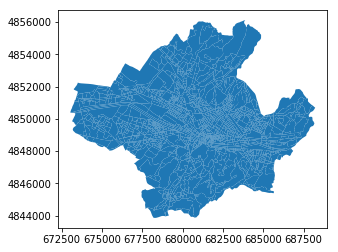

In [71]:
# Load census tracts in Italy
census_tracts = gpd.read_file('data/R09_11_WGS84/R09_11_WGS84.shp')

# Subset to Florence's own
florence_tracts = census_tracts.loc[census_tracts["COD_ISTAT"]== 9048017]

florence_tracts.plot()

In [72]:
# Spatial Join tracts with restaurants
restaurants_tract = gpd.sjoin(restaurants, florence_tracts, op="within")

In [73]:
print(restaurants.crs, florence_tracts.crs)

{'init': 'epsg:4326'} {'init': 'epsg:32632'}


In [74]:
# "In a Spatial Join, observations from to GeoSeries or GeoDataFrames are combined
# based on their spatial relationship to one another." [GeoPandas docs]
restaurants_tract = gpd.sjoin(florence_tracts.to_crs(restaurants.crs),restaurants)

In [75]:
# how many restaurants per tract?
restaurants_tract.groupby("SEZ2011").size().sort_values(ascending=False).head()

SEZ2011
480170060916    9
480170060969    6
480170060943    6
480170060671    5
480170060412    4
dtype: int64

In [76]:
# save variable
restaurants_count = restaurants_tract.groupby("SEZ2011").size().reset_index()

# Merge tracts with counts WITH original tracts
florence_tracts_restaurants_count = pd.merge(florence_tracts, restaurants_count, how="left", on="SEZ2011")

# keep only useful columns
florence_tracts_restaurants_count =  florence_tracts_restaurants_count[["SEZ2011","geometry",0]]

# rename columns
florence_tracts_restaurants_count.columns = ["SEZ2011","geometry","density"]

# assign 0 to areas without restaurants
florence_tracts_restaurants_count = florence_tracts_restaurants_count.fillna(0)

# re-project to EPSG 4326
florence_tracts_restaurants_count_prj = florence_tracts_restaurants_count.to_crs({"init":"epsg:4326"})
# save for later
# florence_tracts_restaurants_count_prj.to_file("data/restaurants_count.geojson",driver="GeoJSON")


/Users/mferretti/.virtualenvs/pycon/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


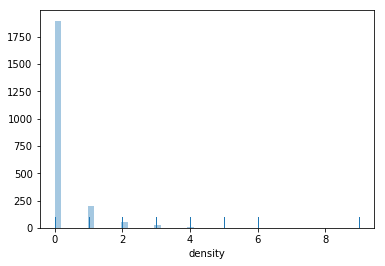

In [77]:
import seaborn as sns
sns.distplot(florence_tracts_restaurants_count_prj["density"], kde=False, rug=True)



In [92]:
from mapboxgl import ChoroplethViz, create_color_stops, jenks


# bin data with jenks classification alg.
jenks_classification = jenks(florence_tracts_restaurants_count_prj["density"].tolist(),7)
# [0.0, 0.0, 1.0, 2.0, 4.0, 9.0]

In [93]:
# create choropleth from polygon features stored as GeoJSON
viz = ChoroplethViz("data/restaurants_count.geojson", 
                     color_property='density',
                     color_stops=create_color_stops(jenks_classification, colors='YlOrRd'),
                     color_function_type='interpolate',
                     line_stroke='--',
                     line_color='rgb(128,0,38)',
                     line_width=1,
                     opacity=0.8,
                     center=(11.25, 43.77),
                     zoom=13,
                     access_token = token,  
                     height_property ="density",
                     height_stops = [[0, 0], [100, 250], [250, 500], [500, 1500]]
                    )

In [94]:
viz.show()

# To Sum-Up:

- `overpass` = sweet, sweet OSM geodata
- `geopandas` = trustworthy companion in your geospatial toolbelt
- `mapboxgl` = sprinkle eye candy dust
- Honorable mentions: `shapely`,`pysal`, `rasterio` , `osmnx`

# <span class="final">Thank you!</span>
## <span class="final">(Questions?)<span>

<span class="contacts">![](imgs/contacts.png)<span>
<!-- [@miccferr](twitter.com/miccferr)-->